<a href="https://colab.research.google.com/github/alison1d3rland/AI-ML-Data-Science-/blob/main/PracticalDataMiningWithTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy
!pip install tweepy --upgrade
!pip install better_profanity
import tweepy
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAADRyiwEAAAAAVyAignb%2BpcKAU5rCs%2BAI5Q45Vyk%3DIC8kWmSHu9dkNW8j2PGBs2DpSkMiKmBFkoE7S6WcaprBHhIfil')

In [ ]:
import tweepy

your_query = "Miami Heat"
query = your_query + ' -is:retweet'

tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100)

for tweet in tweets.data:
    print(tweet.text)
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)

In [ ]:
# Replace with your own search query
query = 'covid -is:retweet'

# Replace the limit=1000 with the maximum number of Tweets you want
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
    print(tweet.id)

In [ ]:
# Replace with your own search query
query = 'covid -is:retweet'

# Name and path of the file where you want the Tweets written to
file_name = 'tweets.txt'

with open(file_name, 'a+') as filehandle:
    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                                  tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(
            limit=1000):
        filehandle.write('%s\n' % tweet.id)

In [ ]:
query = 'Miami+Heat -is:retweet'

tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'],
                                     user_fields=['profile_image_url'], expansions='author_id', max_results=100)

# Get users list from the includes object
users = {u["id"]: u for u in tweets.includes['users']}

for tweet in tweets.data:
    if users[tweet.author_id]:
        user = users[tweet.author_id]
        print(user.profile_image_url)

In [ ]:
!pip install better_profanity

# **Twitter Sentiment Analysis through Data Mining**

In [ ]:
import re

import numpy as np

import tweepy

from tweepy import OAuthHandler

from textblob import TextBlob

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [ ]:
your_query = input("Please enter your topic / person of interest: ")
# your_query = "Ukraine"
query = your_query + ' -is:retweet'
# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 100,
                                     expansions='author_id'
                                     )
print(type(tweets))

Please enter your topic / person of interest: Electric Cars
<class 'tweepy.client.Response'>


In [ ]:
# import the pandas library
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2023-02-06 15:50:41+00:00,I just entered @AutoTrader_UK’s monthly️ #Elec...,None,Andrew Mansell,Andy_Tommy_Gun,England,False,
1,2023-02-06 15:49:17+00:00,@sciam Or perhaps don’t require all cars to be...,None,TenaciousHoney,tenacious_honey,None,False,I’m sweet but a little spicy.
2,2023-02-06 15:49:03+00:00,I just entered @AutoTrader_UK’s monthly️ #Elec...,None,true arrow41,TArrow41,None,False,
3,2023-02-06 15:48:51+00:00,"Tesla is having Nokia moment\n\nThere were 16,...",None,King TG,King_of_de_East,"Dubai, United Arab Emirates",False,forex trader | CEO @Arkfluence ventures | real...
4,2023-02-06 15:48:25+00:00,Globalist pig... you'd fuck our province over ...,None,Conniving Crow,CrowConniving,None,False,


In [ ]:
# import the pandas library
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'text': tweet.text,
        'username': user.username,
        'location': user.location,
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.tail()

,text,username,location
92,Tesla’s delays allowed traditional carmakers t...,William96620719,None
93,Electric cars as the future of the automotive ...,qudach,None
94,I just entered @AutoTrader_UK’s monthly️ #Elec...,Alpha_Net,"Millbury, MA"
95,(Reuters) -Vietnamese electric vehicle maker V...,EaseyJosh,None
96,Electric cars only started becoming mainstream...,Bentler,Washington


In [ ]:
tweets_df.shape

(97, 3)

In [ ]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
tweets_df.iloc[0,0]

'I just entered @AutoTrader_UK’s monthly️ #ElectricCarGiveaway &amp; you can too! This month’s prize is a MG Model MG4 worth over £26k! It’s free to enter &amp; you have until 28th February. All information (including Ts&amp;Cs) can be found here: https://t.co/hsLu9e9BAr'

In [ ]:
tweets_df["text"].iloc[21]

'@zerohedge do they use this stuff in them electric cars i hear about???'

In [ ]:
tweet_list = tweets_df.text.to_list()

In [ ]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

<ipython-input-30-92e0f7140c9e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['i just entered s monthly amp you can too this month s prize is mg model mg4 worth over 26k it s free enter amp you have until 28th february all information including ts amp cs can be found here',
 'or perhaps don t require all cars be electric find different way i m not giving up my car nice try though',
 'i just entered s monthly amp you can too this month s prize is mg model mg4 worth over 26k it s free enter amp you have until 28th february all information including ts amp cs can be found here',
 'tesla is having nokia moment there were 16 437 cars registered switzerland january 2023 3 4 increase over january 2022 best years start since covid pandemic began according swiss auto association at same time electric vehicles made strong',
 'globalist pig youd our province over electric cars hmmmm i have one i bet you dont',
 'this guy',
 'other car companies werent concerned about saving world years ago but when electric cars started be coming more prominent getting subsidized by gover

In [ ]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.35,
 TextBlob("i just entered s monthly amp you can too this month s prize is mg model mg4 worth over 26k it s free enter amp you have until 28th february all information including ts amp cs can be found here"))

In [ ]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]

[[0.35,
  'i just entered s monthly amp you can too this month s prize is mg model mg4 worth over 26k it s free enter amp you have until 28th february all information including ts amp cs can be found here'],
 [0.3,
  'or perhaps don t require all cars be electric find different way i m not giving up my car nice try though'],
 [0.35,
  'i just entered s monthly amp you can too this month s prize is mg model mg4 worth over 26k it s free enter amp you have until 28th february all information including ts amp cs can be found here'],
 [0.4777777777777778,
  'tesla is having nokia moment there were 16 437 cars registered switzerland january 2023 3 4 increase over january 2022 best years start since covid pandemic began according swiss auto association at same time electric vehicles made strong'],
 [0.0,
  'globalist pig youd our province over electric cars hmmmm i have one i bet you dont'],
 [0.0, 'this guy'],
 [0.39375,
  'other car companies werent concerned about saving world years ago bu

In [ ]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.350000,i just entered s monthly amp you can too this ...
1,0.300000,or perhaps don t require all cars be electric ...
2,0.350000,i just entered s monthly amp you can too this ...
3,0.477778,tesla is having nokia moment there were 16 437...
4,0.000000,globalist pig youd our province over electric ...
...,...,...
92,0.250000,tesla s delays allowed traditional carmakers b...
93,0.000000,electric cars as future automotive industry
94,0.350000,i just entered s monthly amp you can too this ...
95,-0.095833,reuters vietnamese electric vehicle maker vinf...


In [ ]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'.

m=pd.Series(n)

m

0     0.350000
1     0.300000
2     0.350000
3     0.477778
4     0.000000
        ...   
92    0.250000
93    0.000000
94    0.350000
95   -0.095833
96    0.112500
Name: polarity, Length: 97, dtype: float64

In [ ]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1

print(pos,neg,neu)

Positive
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Neutral
Positive
Negative
Neutral
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Neutral
Negative
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Neutral
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Neutral
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Neutral
Negative
Neutral
Neutral
Positive
Neutral
Positive
Negative
Positive
66 13 18


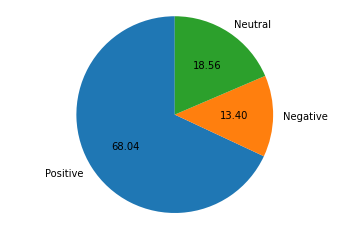

In [ ]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [ ]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

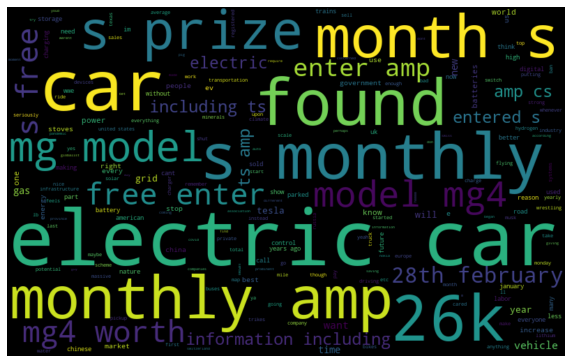

In [ ]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Sentiment Analysis (through Scraping) - Data Mining

In [ ]:
!pip install snscrape
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
tweets_list = []
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Covid since:2022-01-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])

# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])
tweets_to_df.shape

In [ ]:
tweets_to_df.head() #lists first five tweets

In [ ]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original tweets with cleaned Tweets

In [ ]:
tweets_to_df.to_csv('tweets_covid.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_covid.csv',index_col=0) #reads csv file

In [ ]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

In [ ]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [ ]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

In [ ]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

In [ ]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#create a function for wordcloud
def create_wordcloud(text):
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [ ]:
#break each tweet sentence into words
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

In [ ]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe

In [ ]:
#plots the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()



```
# Random Stuff
```

# Random Stuff

In [ ]:
# This code allows you to get a users timeline
# Replace user ID
# id = '2244994945'
# Elon Musk is 44196397
id = '44196397'
# https://www.codeofaninja.com/tools/find-twitter-id/#:~:text=How%20to%20use%3F&text=Put%20your%20username%20(without%20%40%20sign,appear%20in%20the%20green%20box

tweets = client.get_users_tweets(id=id, tweet_fields=['context_annotations','created_at','geo'])

for tweet in tweets.data:
    print(tweet)

In [ ]:
# Counts for a query
# Replace with your own search query
query = 'covid -is:retweet'

counts = client.get_recent_tweets_count(query=query, granularity='day')

for count in counts.data:
    print(count)

In [ ]:
# Get the Twitter IDs of the followers of a user

# Replace user ID
id = '44196397'

users = client.get_users_followers(id=id, user_fields=['profile_image_url'])

for user in users.data:
    print(user.id)

In [ ]:
# Who is Elon Musk Following
# Replace user ID
id = '44196397'

users = client.get_users_following(id=id, user_fields=['profile_image_url'])

for user in users.data:
    print(user.id)

In [ ]:
# Who like a tweet based on the tweet ID
# Replace Tweet ID
id = '1441054496931541004'

users = client.get_liking_users(id=id, user_fields=['profile_image_url'])

for user in users.data:
    print(user)

In [ ]:
#Who retweet a tweet based on tweet id
# Replace Tweet ID
id = '1441054496931541004'

users = client.get_retweeters(id=id, user_fields=['profile_image_url'])

for user in users.data:
    print(user)

In [ ]:
# Give me all of the tweets that a user liked
# Replace User ID
id = '44196397'

tweets = client.get_liked_tweets(id=id, tweet_fields=['context_annotations','created_at','geo'])

for tweet in tweets.data:
    print(tweet)

In [ ]:
# Look up users by twitter ID
# Replace User IDs
ids = ['44196397']

users = client.get_users(ids=ids, user_fields=['profile_image_url'])

for user in users.data:
    print(user.profile_image_url)
for user in users.data:
    print(user)